<a href="https://colab.research.google.com/github/canmike/flood-mapping/blob/main/indexes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Applying Indexes For Flood Mapping

### Bands for Landsat-8:
*   Band 1 Coastal Aerosol (0.43 - 0.45 µm) 30 m
*   Band 2 Blue (0.450 - 0.51 µm) 30 m
*   Band 3 Green (0.53 - 0.59 µm) 30 m
*   Band 4 Red (0.64 - 0.67 µm) 30 m
*   Band 5 Near-Infrared (0.85 - 0.88 µm) 30 m
*   Band 6 SWIR 1 (1.57 - 1.65 µm) 30 m
*   Band 7 SWIR 2 (2.11 - 2.29 µm) 30 m




## 1. Indexes to be applied

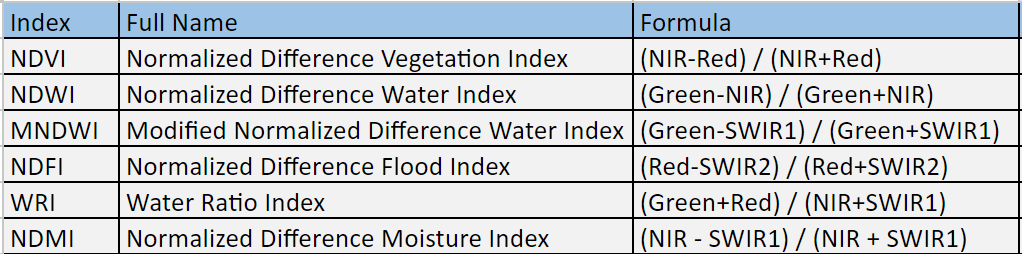

## 2. Applying and visualizing indexes

In [15]:
from osgeo import gdal
import numpy as np

# Band numbers
BAND_COASTAL_AEROSOL = 1
BAND_BLUE = 2
BAND_GREEN = 3
BAND_RED = 4
BAND_NIR = 5
BAND_SWIR1 = 6
BAND_SWIR2 = 7

def read_band(ds, band_number):
    """Reads a specific band from the given file."""
    return ds.GetRasterBand(band_number).ReadAsArray().astype(float)

def calculate_ndvi(file_path):
    """Calculates NDVI: (NIR - Red) / (NIR + Red)"""
    ds = gdal.Open(file_path)
    red = read_band(ds, BAND_RED)
    nir = read_band(ds, BAND_NIR)
    ndvi = (nir - red) / (nir + red + 0.0000001)
    return np.nan_to_num(ndvi, nan=np.min(ndvi))

def calculate_ndwi(file_path):
    """Calculates NDWI: (Green - NIR) / (Green + NIR)"""
    ds = gdal.Open(file_path)
    green = read_band(ds, BAND_GREEN)
    nir = read_band(ds, BAND_NIR)
    ndwi = (green - nir) / (green + nir + 0.0000001)
    return np.nan_to_num(ndwi, nan=np.min(ndwi))

def calculate_mndwi(file_path):
    """Calculates MNDWI: (Green - SWIR1) / (Green + SWIR1)"""
    ds = gdal.Open(file_path)
    green = read_band(ds, BAND_GREEN)
    swir1 = read_band(ds, BAND_SWIR1)
    mndwi = (green - swir1) / (green + swir1 + 0.0000001)
    return np.nan_to_num(mndwi, nan=np.min(mndwi))

def calculate_ndfi(file_path):
    """Calculates NDFI: (Red - SWIR2) / (Red + SWIR2)"""
    ds = gdal.Open(file_path)
    red = read_band(ds, BAND_RED)
    swir2 = read_band(ds, BAND_SWIR2)
    ndfi = (red - swir2) / (red + swir2 + 0.0000001)
    return np.nan_to_num(ndfi, nan=np.min(ndfi))

def calculate_wri(file_path):
    """Calculates WRI: (Green + Red) / (NIR + SWIR1)"""
    ds = gdal.Open(file_path)
    green = read_band(ds, BAND_GREEN)
    red = read_band(ds, BAND_RED)
    nir = read_band(ds, BAND_NIR)
    swir1 = read_band(ds, BAND_SWIR1)
    wri = (green + red) / (nir + swir1 + 0.0000001)
    return np.nan_to_num(wri, nan=np.min(wri))

def calculate_ndmi(file_path):
    """Calculates NDMI: (NIR - SWIR1) / (NIR + SWIR1)"""
    ds = gdal.Open(file_path)
    nir = read_band(ds, BAND_NIR)
    swir1 = read_band(ds, BAND_SWIR1)
    ndmi = (nir - swir1) / (nir + swir1 + 0.0000001)
    return np.nan_to_num(ndmi, nan=np.min(ndmi))

In [16]:
import matplotlib.pyplot as plt
import numpy as np

def visualize_index(index_array, title='Index Visualization', cmap='viridis', colorbar_label=''):
    """
    Visualizes a given index array (like NDVI, NDWI, etc.).

    Parameters:
    - index_array: The 2D array of index values to visualize.
    - title: Title of the plot.
    - cmap: Colormap to use for visualization.
    - colorbar_label: Label for the colorbar.
    """

    plt.figure(figsize=(8, 8))
    plt.imshow(index_array, cmap=cmap)
    plt.colorbar(label=colorbar_label)
    plt.title(title)
    plt.xlabel('Pixel')
    plt.ylabel('Pixel')
    plt.show()


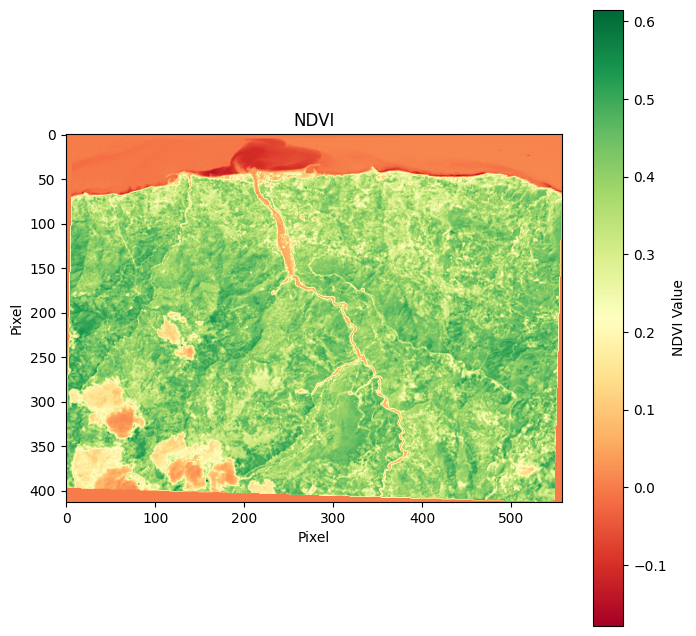

In [17]:
after_path = 'after.tif'
ndvi = calculate_ndvi(after_path)
visualize_index(ndvi, title='NDVI', cmap='RdYlGn', colorbar_label='NDVI Value')

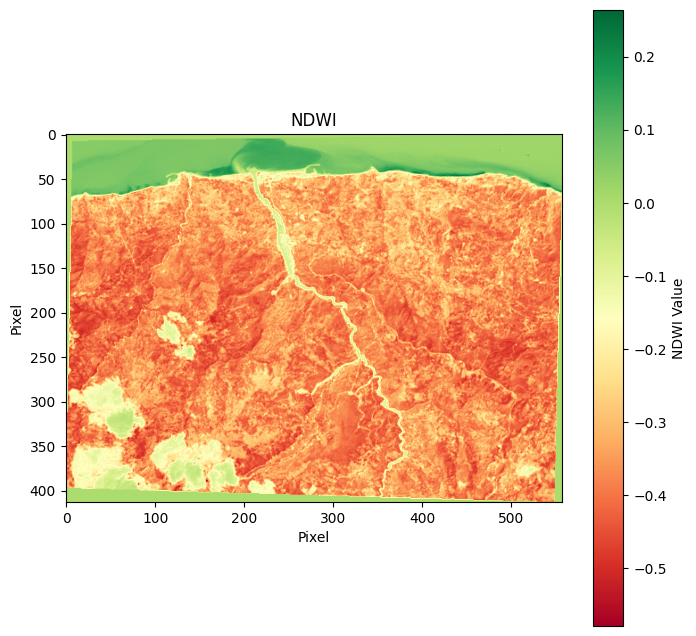

In [18]:
ndwi = calculate_ndwi(after_path)
visualize_index(ndwi, title='NDWI', cmap='RdYlGn', colorbar_label='NDWI Value')

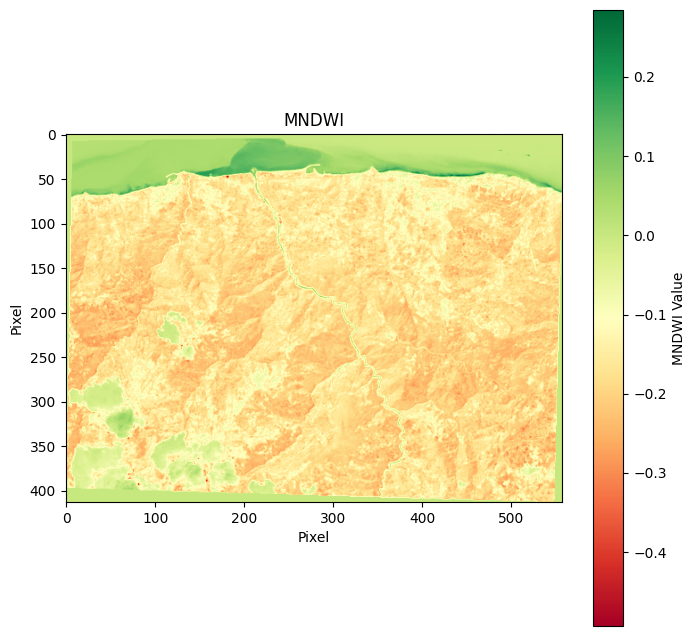

In [19]:
mndwi = calculate_mndwi(after_path)
visualize_index(mndwi, title='MNDWI', cmap='RdYlGn', colorbar_label='MNDWI Value')

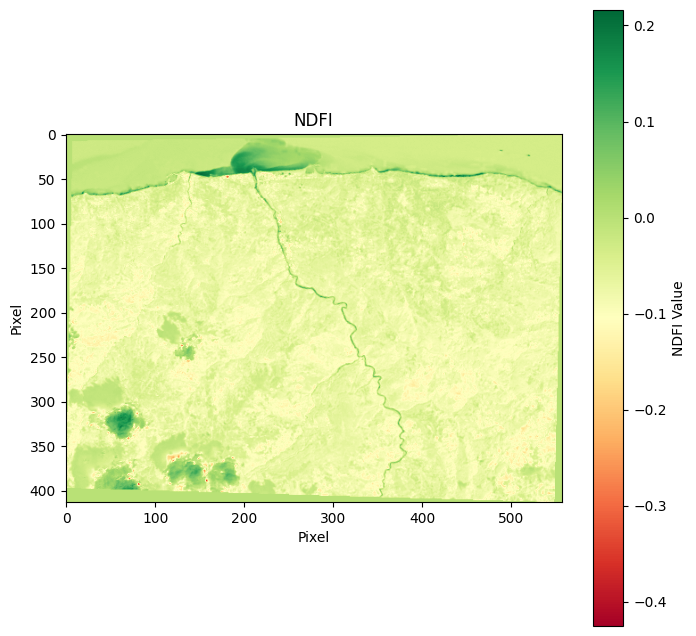

In [20]:
ndfi = calculate_ndfi(after_path)
visualize_index(ndfi, title='NDFI', cmap='RdYlGn', colorbar_label='NDFI Value')

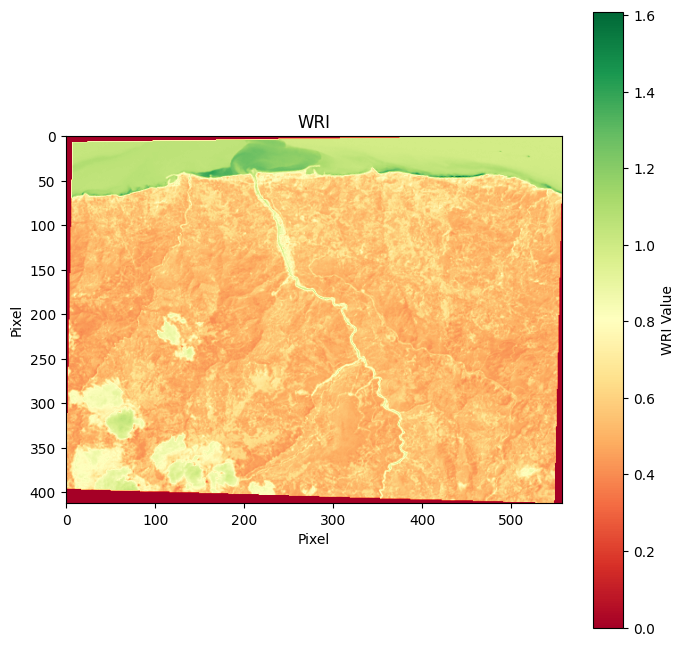

In [21]:
wri = calculate_wri(after_path)
visualize_index(wri, title='WRI', cmap='RdYlGn', colorbar_label='WRI Value')

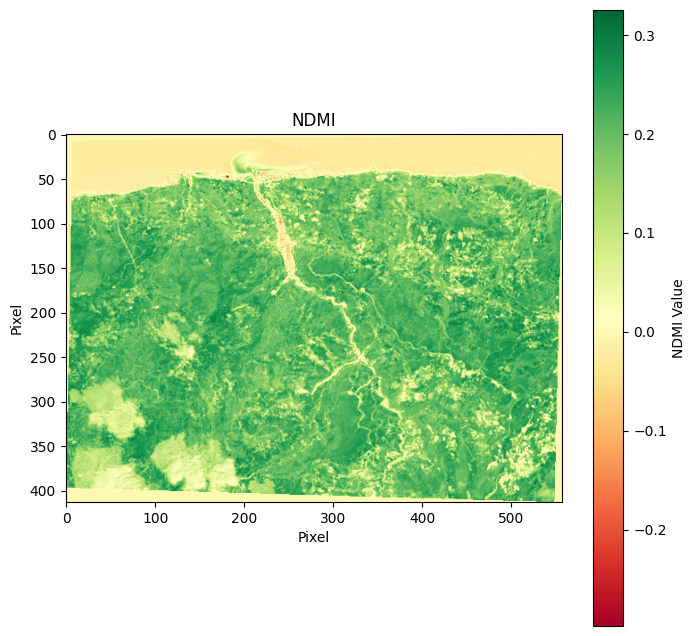

In [22]:
ndmi = calculate_ndmi(after_path)
visualize_index(ndmi, title='NDMI', cmap='RdYlGn', colorbar_label='NDMI Value')

## 3. Calculating the correlation between indexes

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def calculate_correlation_matrix(file_path):
    # Calculate indices
    ndvi = calculate_ndvi(file_path).flatten()
    ndwi = calculate_ndwi(file_path).flatten()
    mndwi = calculate_mndwi(file_path).flatten()
    ndfi = calculate_ndfi(file_path).flatten()
    wri = calculate_wri(file_path).flatten()
    ndmi = calculate_ndmi(file_path).flatten()

    # Create a DataFrame
    data = {
        'NDVI': ndvi,
        'NDWI': ndwi,
        'MNDWI': mndwi,
        'NDFI': ndfi,
        'WRI': wri,
        'NDMI': ndmi
    }
    df = pd.DataFrame(data)

    # Calculate correlation
    corr_matrix = df.corr()

    # Plotting the correlation matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
    plt.title('Correlation Matrix of Indices')
    plt.show()

    return corr_matrix


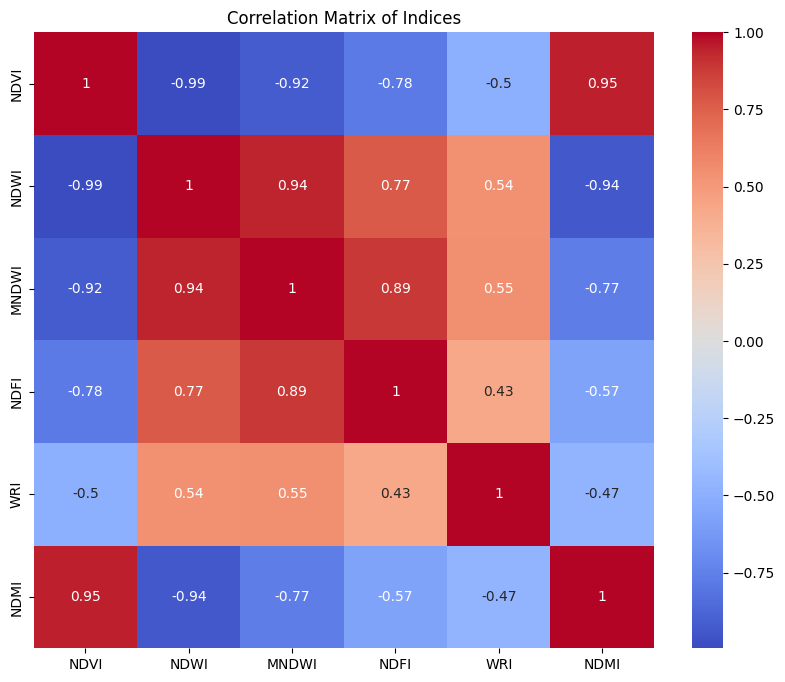

In [24]:
after_path = 'after.tif'
corr_matrix = calculate_correlation_matrix(after_path)

In [25]:
corr_matrix

,NDVI,NDWI,MNDWI,NDFI,WRI,NDMI
NDVI,1.000000,-0.994795,-0.921237,-0.776935,-0.503640,0.949930
NDWI,-0.994795,1.000000,0.939306,0.771138,0.541947,-0.939860
MNDWI,-0.921237,0.939306,1.000000,0.887133,0.550363,-0.766665
NDFI,-0.776935,0.771138,0.887133,1.000000,0.429445,-0.568165
WRI,-0.503640,0.541947,0.550363,0.429445,1.000000,-0.470441
NDMI,0.949930,-0.939860,-0.766665,-0.568165,-0.470441,1.000000


 Correlation coefficient close to +1 indicates a strong positive relationship, meaning that as one index increases, the other tends to increase as well. Conversely, a correlation near -1 suggests a strong negative relationship, where an increase in one index corresponds to a decrease in the other.

 For flood mapping, these correlations are important: a high positive correlation between indices like NDFI (Normalized Difference Flood Index) and other water-related indices (like NDWI or MNDWI) can indicate robustness in identifying water bodies or flood extents. On the other hand, a negative correlation might reveal contrasting properties of the landscape, such as vegetation versus water, aiding in distinguishing flood-affected areas from vegetated regions.